# CIFAR-10 Veri Seti Üzerinde CNN ve RandomForest ile  Görüntü Sınıflandırma Projesi

Bu notebook'ta CIFAR-10 veri seti üzerinde CNN, Random Forest kullanılarak görüntü sınıflandırma işlemi gerçekleştirilecek.
Modellerin performansları değerlendirilecek ve  tahminler görsel olarak sunulacaktır.


In [ ]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
# Veri setinin projemize dahil edilmesi
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Veri setinin şeklinin kontrol edilmesi
print("Eğitim verisi shape:", x_train.shape)
print("Eğitim etiket shape:", y_train.shape)
print("Test verisi shape:", x_test.shape)
print("Test etiket shape:", y_test.shape)

Eğitim verisi shape: (50000, 32, 32, 3)
Eğitim etiket shape: (50000, 1)
Test verisi shape: (10000, 32, 32, 3)
Test etiket shape: (10000, 1)


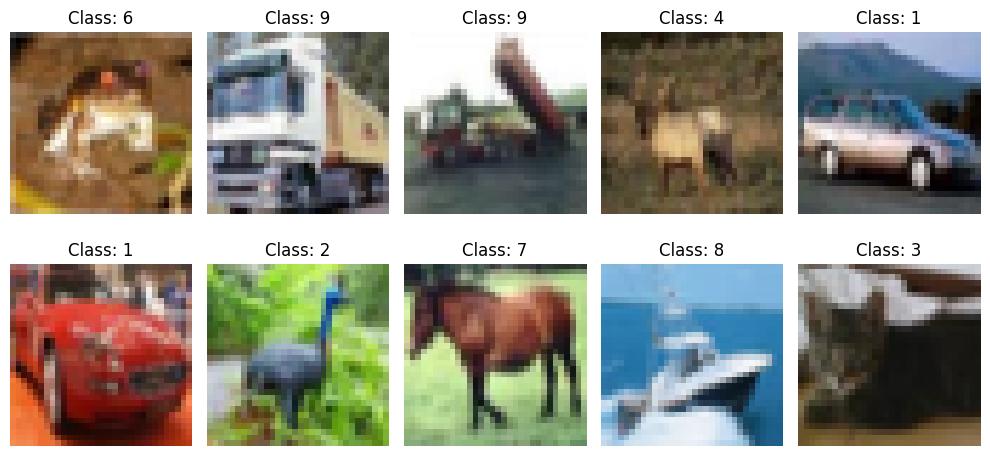

In [ ]:
# Veri setinden görselleştirmeler
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:

# Veri setinin normalize ettik
x_train = x_train / 255.0
x_test = x_test / 255.0

# Bu işlemi yapmamızın sebebi modelimizin veri setini daha hızlı ve iyi öğrenmesini sağlamaktır .


In [ ]:
# görüntü sınıflandırma projelerinde başarılı sonuçlar alındığından dolayı CNN modeli seçildi

# CNN modelinin oluşturulması
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# CNN modelinin derlenmesi
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# CNN modelinin eğitilmesi
cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)


Epoch 1/5
782/782 [==============================] - 69s 87ms/step - loss: 1.5132 - accuracy: 0.4561
Epoch 2/5
782/782 [==============================] - 64s 82ms/step - loss: 1.1539 - accuracy: 0.5981
Epoch 3/5
782/782 [==============================] - 65s 83ms/step - loss: 1.0173 - accuracy: 0.6445
Epoch 4/5
782/782 [==============================] - 62s 80ms/step - loss: 0.9385 - accuracy: 0.6752
Epoch 5/5
782/782 [==============================] - 63s 80ms/step - loss: 0.8714 - accuracy: 0.6975


In [ ]:
# Random Forest modelinin oluşturulması ve eğitilmesi
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train.reshape(x_train.shape[0], -1), y_train.ravel())


RandomForestClassifier(random_state=42)

In [ ]:
# CNN modelinin test verisi üzerinde değerlendirilmesi
cnn_pred = cnn_model.predict(x_test)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)
cnn_accuracy = accuracy_score(y_test, cnn_pred_classes)
cnn_f1 = f1_score(y_test, cnn_pred_classes, average='weighted')
cnn_roc_auc = roc_auc_score(to_categorical(y_test), cnn_pred, multi_class='ovo')
print(f"CNN Modeli Doğruluk Oranı: {cnn_accuracy}")
print(f"CNN Modeli F1 Skoru: {cnn_f1}")
print(f"CNN Modeli ROC AUC Skoru: {cnn_roc_auc}")



# Random Forest modelinin test verisi üzerinde değerlendirilmesi
rf_pred = rf_model.predict(x_test.reshape(x_test.shape[0], -1))
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_roc_auc = roc_auc_score(to_categorical(y_test), rf_model.predict_proba(x_test.reshape(x_test.shape[0], -1)), multi_class='ovo')
print(f"Random Forest Modeli Doğruluk Oranı: {rf_accuracy}")
print(f"Random Forest Modeli F1 Skoru: {rf_f1}")
print(f"Random Forest Modeli ROC AUC Skoru: {rf_roc_auc}")


313/313 [==============================] - 10s 32ms/step
CNN Modeli Doğruluk Oranı: 0.6454
CNN Modeli F1 Skoru: 0.641565150500256
CNN Modeli ROC AUC Skoru: 0.9435067222222223
Random Forest Modeli Doğruluk Oranı: 0.4654
Random Forest Modeli F1 Skoru: 0.4620635444371268
Random Forest Modeli ROC AUC Skoru: 0.8525341444444445


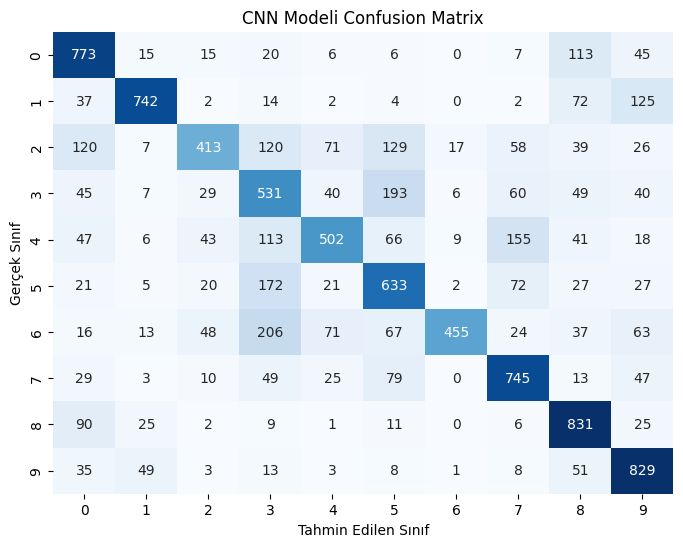

In [ ]:
# Confusion matrix görselleştirme - CNN Modeli
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, cnn_pred_classes), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('CNN Modeli Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()



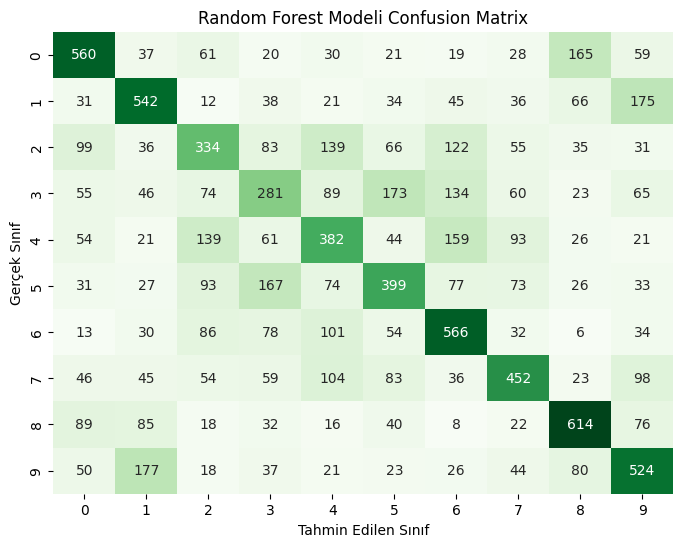

In [ ]:

# Confusion matrix görselleştirme - Random Forest Modeli
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest Modeli Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

1/1 [==============================] - 0s 44ms/step


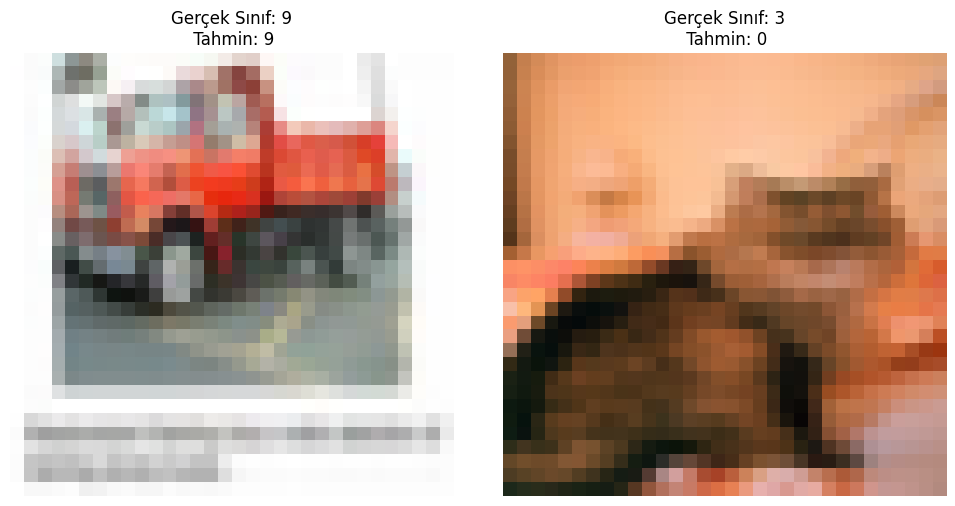

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(2):
    index = np.random.randint(0, len(x_test))
    pred_class = np.argmax(cnn_model.predict(x_test[index].reshape(1, 32, 32, 3)), axis=1)[0]

    plt.subplot(1, 2, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Gerçek Sınıf: {y_test[index][0]}\n Tahmin: {pred_class}")
    plt.axis("off")
plt.tight_layout()
plt.show()

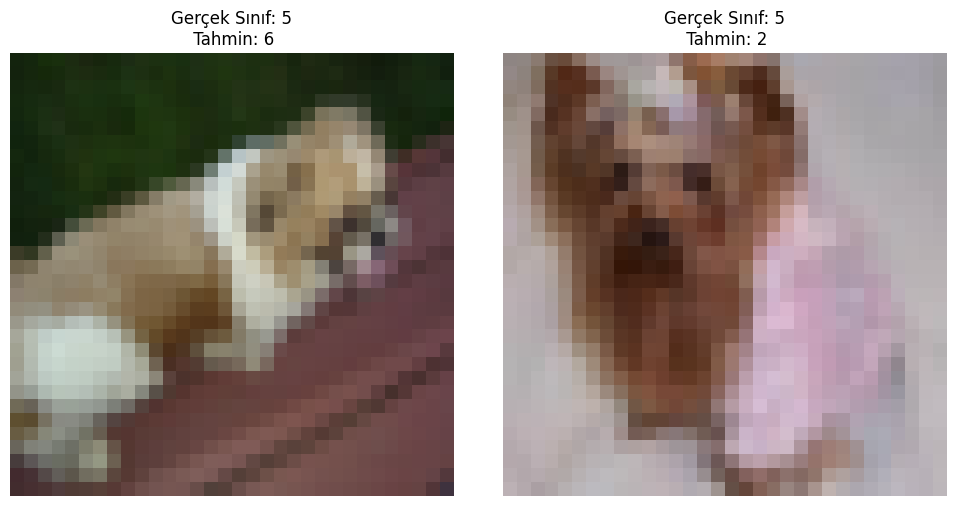

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(2):
    index = np.random.randint(0, len(x_test))
    pred_class = rf_model.predict(x_test[index].reshape(1, -1))[0]

    plt.subplot(1, 2, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Gerçek Sınıf: {y_test[index][0]}\n Tahmin: {pred_class}")
    plt.axis("off")
plt.tight_layout()
plt.show()